<font color="red">

1. Загрузим текст на русском языке из файла (файл test.txt, объем файла ~ 200 Кб) текст выбираем самостоятельно;
2. Удалим стоп-слова и знаки препинания;
3. Выполним токенизацию, подсчёт слов и анализ документа DataFrame (Слово|Количество|Ранг|Процент);
4. Построим гистограмму, treepmap, облако слов.   

</font>


In [1]:
import re
import string
import spacy
from wordcloud import WordCloud
import squarify
import pandas as pd
from collections import Counter

### 1. Загрузим текст и проведём токенизацию документа.

In [2]:
test = open('test.txt', 'r', encoding='utf-8')
tokens = []
hist = {}
strippables = string.punctuation + string.whitespace 

for line in test:          
    line = line.lower()  
    line = re.sub(r'[^а-яА-Я ^0-9]', '', str(line))    
    for word in line.split():       
        word = word.strip(strippables)   
        hist[word] = hist.get(word, 0) + 1  
        tokens.append(word)
hist

{'аннотация': 1,
 'действие': 2,
 'происходит': 2,
 'в': 520,
 'годы': 4,
 'острого': 1,
 'религиозного': 1,
 'и': 738,
 'политического': 1,
 'конфликта': 1,
 'между': 14,
 'движением': 3,
 'реформации': 2,
 'сторонниками': 2,
 'римскокатолической': 1,
 'церкви': 2,
 'вальтер': 1,
 'скотт': 1,
 'аббат': 5,
 'предисловие': 1,
 'к': 174,
 'аббату': 2,
 'из': 94,
 'того': 34,
 'что': 289,
 'уже': 29,
 'было': 67,
 'сказано': 3,
 'предисловии': 3,
 'монастырю': 2,
 'с': 188,
 'неизбежностью': 1,
 'вытекает': 1,
 'автор': 9,
 'рассматривает': 1,
 'этот': 28,
 'роман': 5,
 'как': 162,
 'своего': 26,
 'рода': 12,
 'неудачу': 2,
 'книгопродавцы': 1,
 'правда': 4,
 'не': 437,
 'жаловались': 1,
 'на': 260,
 'плохой': 2,
 'сбыт': 1,
 'книги': 1,
 'ибо': 25,
 'если': 69,
 'считать': 8,
 'особо': 4,
 'счастливых': 1,
 'или': 80,
 'противоположном': 1,
 'случае': 16,
 'столь': 22,
 'же': 122,
 'несчастливых': 1,
 'обстоятельств': 4,
 'популярность': 2,
 'писателя': 2,
 'возникает': 1,
 'меркнет': 1,

In [3]:
tokens[:100]

['аннотация',
 'действие',
 'происходит',
 'в',
 'годы',
 'острого',
 'религиозного',
 'и',
 'политического',
 'конфликта',
 'между',
 'движением',
 'реформации',
 'и',
 'сторонниками',
 'римскокатолической',
 'церкви',
 'вальтер',
 'скотт',
 'аббат',
 'предисловие',
 'к',
 'аббату',
 'из',
 'того',
 'что',
 'уже',
 'было',
 'сказано',
 'в',
 'предисловии',
 'к',
 'монастырю',
 'с',
 'неизбежностью',
 'вытекает',
 'что',
 'автор',
 'рассматривает',
 'этот',
 'роман',
 'как',
 'своего',
 'рода',
 'неудачу',
 'книгопродавцы',
 'правда',
 'не',
 'жаловались',
 'на',
 'плохой',
 'сбыт',
 'книги',
 'ибо',
 'если',
 'не',
 'считать',
 'особо',
 'счастливых',
 'или',
 'в',
 'противоположном',
 'случае',
 'столь',
 'же',
 'несчастливых',
 'обстоятельств',
 'популярность',
 'писателя',
 'не',
 'возникает',
 'и',
 'не',
 'меркнет',
 'под',
 'влиянием',
 'какойлибо',
 'одной',
 'публикации',
 'морю',
 'нужно',
 'время',
 'как',
 'для',
 'прилива',
 'так',
 'и',
 'для',
 'отлива',
 'тем',
 'не',
 

In [4]:
nlp = spacy.load("ru_core_news_sm")  

def spacy_tokenize(text):    
    doc = nlp.tokenizer(text) 
    return [token.text for token in doc]

spacy_tokens = spacy_tokenize(str(tokens))
spacy_tokens[:10]

['[', "'", 'аннотация', "'", ',', "'", 'действие', "'", ',', "'"]

### 2. Удалим стоп-слова и знаки препинания.

In [5]:
spacy_stopwords = spacy.lang.ru.stop_words.STOP_WORDS 

def remove_stopwords(tokens):
    cleaned_tokens = []  
    punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–'
     
    for token in tokens:
        if (token not in spacy_stopwords) & (token not in punct):
            cleaned_tokens.append(token)
    
    return cleaned_tokens


cleaned_tokens = remove_stopwords(spacy_tokens)

cleaned_tokens

['аннотация',
 'действие',
 'происходит',
 'годы',
 'острого',
 'религиозного',
 'политического',
 'конфликта',
 'между',
 'движением',
 'реформации',
 'сторонниками',
 'римскокатолической',
 'церкви',
 'вальтер',
 'скотт',
 'аббат',
 'предисловие',
 'аббату',
 'сказано',
 'предисловии',
 'монастырю',
 'неизбежностью',
 'вытекает',
 'автор',
 'рассматривает',
 'роман',
 'рода',
 'неудачу',
 'книгопродавцы',
 'правда',
 'жаловались',
 'плохой',
 'сбыт',
 'книги',
 'ибо',
 'считать',
 'особо',
 'счастливых',
 'противоположном',
 'случае',
 'столь',
 'несчастливых',
 'обстоятельств',
 'популярность',
 'писателя',
 'возникает',
 'меркнет',
 'под',
 'влиянием',
 'какойлибо',
 'публикации',
 'морю',
 'нужно',
 'время',
 'прилива',
 'отлива',
 'менее',
 'сознавал',
 'положении',
 'недостаточный',
 'успех',
 'какойто',
 'мере',
 'равнозначен',
 'поражению',
 'разумеется',
 'испытывал',
 'особой',
 'склонности',
 'считать',
 'причины',
 'неудачи',
 'лежат',
 'крайней',
 'мере',
 'хотелось',
 'т

### 3. Выполним токенизацию, подсчёт слов и анализ документа DataFrame (Слово|Количество|Ранг|Процент).


Создадим DataFrame, содержащий функции, возвращающие:

* Количество и процент документов с токеном. 
* Количество токенов.
* Их ранг по частотности употребления по отношению к другим токенам. 
* Процент токенов от общего состава документа. 
* Текущую сумму этих процентов.

In [6]:
def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    df = pd.DataFrame(temp, columns = ['word', 'count'])
    df['rank'] = df['count'].rank(method='first', ascending=False)
    
    total = df['count'].sum()
    df['pct_total'] = df['count'].apply(lambda x: x / total)
    
    df = df.sort_values(by='rank')
    df['cumul_pct_total'] = df['pct_total'].cumsum()
    
    t2 = list(zip(appears_in.keys(), appears_in.values()))
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    df = ac.merge(df, on='word')
    
    df['appears_in_pct'] = df['appears_in'].apply(lambda x: x / total_docs)
    
    
    return df.sort_values(by='rank')
  
df = count([cleaned_tokens])

df.head(10)

,word,appears_in,count,rank,pct_total,cumul_pct_total,appears_in_pct
4822,леди,1,162,1.0,0.013074,0.013074,1.0
3222,эвенел,1,108,2.0,0.008716,0.021790,1.0
1198,сказала,1,61,3.0,0.004923,0.026713,1.0
5201,ни,1,46,4.0,0.003712,0.030425,1.0
217,лилиас,1,46,5.0,0.003712,0.034138,1.0
782,миледи,1,40,6.0,0.003228,0.037366,1.0
3269,роланд,1,40,7.0,0.003228,0.040594,1.0
6004,ли,1,35,8.0,0.002825,0.043419,1.0
2883,более,1,35,9.0,0.002825,0.046243,1.0
58,хотя,1,30,10.0,0.002421,0.048664,1.0


### 4. Построим гистограмму частоты слов в тексте

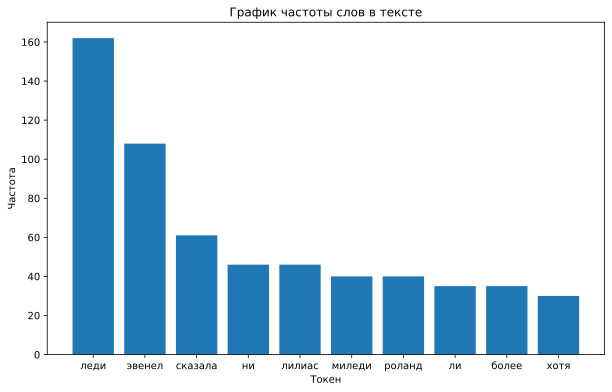

In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rc('figure', figsize=(10, 6))

x = list(df['word'])[:10]
y = list(df['count'])[:10]

plt.bar(x, y)
plt.title('График частоты слов в тексте')
plt.xlabel('Токен')                      
plt.ylabel('Частота')                
plt.show()    

### Построим treepmap

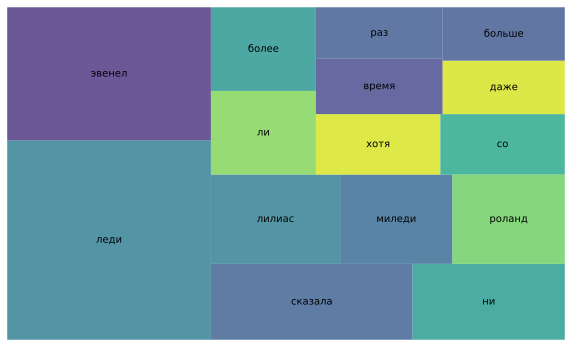

In [8]:
df_top20 = df[df['rank'] <= 15]
squarify.plot(sizes=df_top20['pct_total'], label=df_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Построим облако слов.

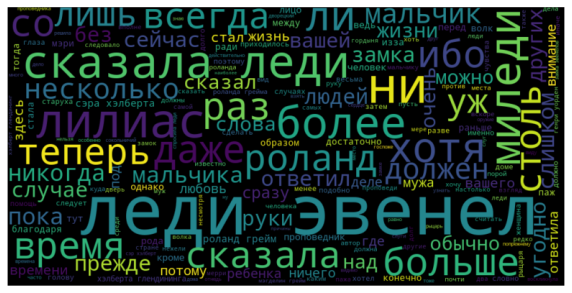

In [9]:
unique_string = (" ").join(cleaned_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()